IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING DATASET

In [2]:
mall = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = mall.drop(columns=['CustomerID','Gender'])
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


SCALING FOR BEETTER RESULTS

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

PCA VISUALIZATION

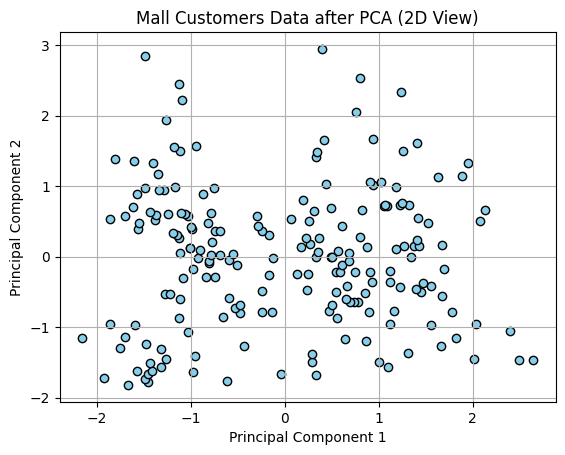

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c='skyblue', edgecolors='black')
plt.title("Mall Customers Data after PCA (2D View)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

FITTING KMEANS MODEL

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

X['Cluster'] = kmeans.labels_
print(X.head())

   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        2
1   21                  15                      81        2
2   20                  16                       6        2
3   23                  16                      77        2
4   31                  17                      40        2


ELBOW METHOD FOR OPTIMAL K

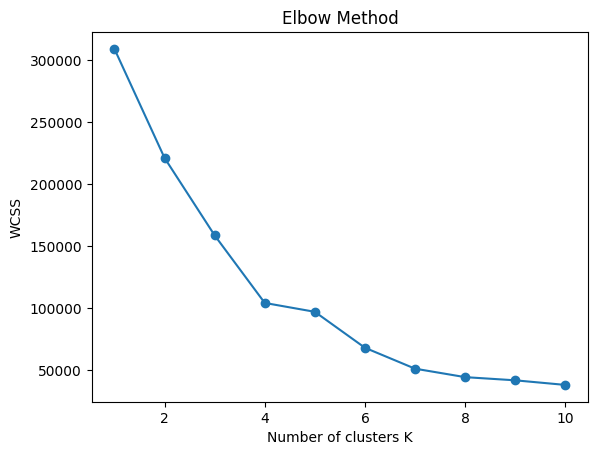

In [12]:
wcss = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X.iloc[:, :-1])
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('WCSS')
plt.show()


COLOR CODE VISUALIZATION

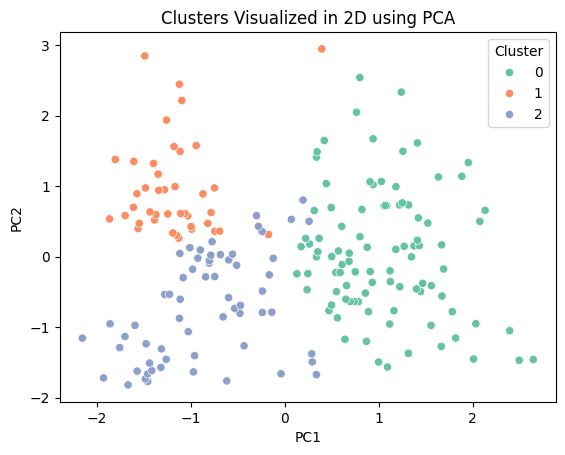

In [13]:
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['Cluster'] = X['Cluster']

sns.scatterplot(data=X_pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("Clusters Visualized in 2D using PCA")
plt.show()


SILHOUETTE SCORE

In [15]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X.iloc[:, :-1], X['Cluster'])
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.31
